### Loading Libraries

In [5]:
# load libararies
library(vegan)
library(phyloseq)
library(ranacapa)
library(ape)
library(ggplot2)
library(ggpubr)
library(plotly)
library(reshape2)

In [6]:
# create directories to save files
dir.create(file.path('../../results/figures'), showWarnings = FALSE)
dir.create(file.path('../../results/figures', 'figure2'), showWarnings = FALSE)

# Alpha Diversity & Rarefraction

### Loading Data

In [7]:
# load phyloseq file
ps <- readRDS('../../data/phyloseq/nohost_asv/phyloseq.rds')
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 17022 taxa and 199 samples ]
sample_data() Sample Data:       [ 199 samples by 57 sample variables ]
tax_table()   Taxonomy Table:    [ 17022 taxa by 7 taxonomic ranks ]

### Alpha-diversity
Steps: 
1. Rarefy to the depth 
2. Compute alpha-diversity & assess significance using Wilcoxon signed rank test

#### 1. Rarefy

In [8]:
set.seed(295) # setting seed to replicate the randomized rarefraction
# rarefy phyloseq object
ps_rarefied <- rarefy_even_depth(ps, 1e+05)
ps_rarefied

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

3 samples removedbecause they contained fewer reads than `sample.size`.

Up to first five removed samples are: 


sample_044sample_063sample_168

...

2379OTUs were removed because they are no longer 
present in any sample after random subsampling


...



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14643 taxa and 196 samples ]
sample_data() Sample Data:       [ 196 samples by 57 sample variables ]
tax_table()   Taxonomy Table:    [ 14643 taxa by 7 taxonomic ranks ]

rarefying sample sample_001
rarefying sample sample_002
rarefying sample sample_003
rarefying sample sample_004
rarefying sample sample_005
rarefying sample sample_006
rarefying sample sample_007
rarefying sample sample_008
rarefying sample sample_009
rarefying sample sample_010
rarefying sample sample_011
rarefying sample sample_012
rarefying sample sample_013
rarefying sample sample_014
rarefying sample sample_015
rarefying sample sample_016
rarefying sample sample_017
rarefying sample sample_018
rarefying sample sample_019
rarefying sample sample_020
rarefying sample sample_021
rarefying sample sample_022
rarefying sample sample_023
rarefying sample sample_024
rarefying sample sample_025
rarefying sample sample_026
rarefying sample sample_027
rarefying sample sample_028
rarefying sample sample_029
rarefying sample sample_030
rarefying sample sample_031
rarefying sample sample_032
rarefying sample sample_033
rarefying sample sample_034
rarefying sample sample_035
rarefying sample sam

Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 6”


rarefying sample sample_134
rarefying sample sample_135
rarefying sample sample_136
rarefying sample sample_137
rarefying sample sample_138


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample sample_139
rarefying sample sample_140
rarefying sample sample_141
rarefying sample sample_142
rarefying sample sample_143
rarefying sample sample_144
rarefying sample sample_145
rarefying sample sample_146
rarefying sample sample_147
rarefying sample sample_148
rarefying sample sample_149
rarefying sample sample_150
rarefying sample sample_151
rarefying sample sample_152
rarefying sample sample_153


Warning message in vegan::rarefy(x[i, , drop = FALSE], n, se = se):
“most observed count data have counts 1, but smallest count is 2”


rarefying sample sample_154
rarefying sample sample_155
rarefying sample sample_156
rarefying sample sample_157
rarefying sample sample_158
rarefying sample sample_159
rarefying sample sample_160
rarefying sample sample_161
rarefying sample sample_162
rarefying sample sample_163
rarefying sample sample_164
rarefying sample sample_165
rarefying sample sample_166
rarefying sample sample_167
rarefying sample sample_169
rarefying sample sample_170
rarefying sample sample_171
rarefying sample sample_172
rarefying sample sample_173
rarefying sample sample_174
rarefying sample sample_175
rarefying sample sample_176
rarefying sample sample_177
rarefying sample sample_178
rarefying sample sample_179
rarefying sample sample_180
rarefying sample sample_181
rarefying sample sample_182
rarefying sample sample_183
rarefying sample sample_184
rarefying sample sample_185
rarefying sample sample_186
rarefying sample sample_187
rarefying sample sample_188
rarefying sample sample_189
rarefying sample sam

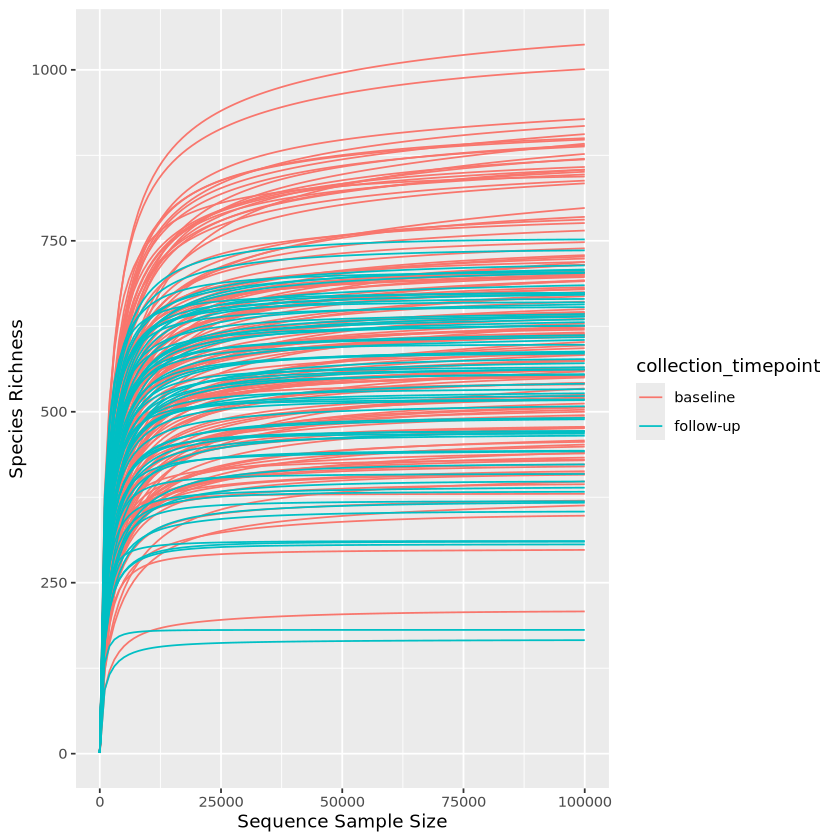

In [9]:
# look at the rarefraction curve
p <- ggrare(ps_rarefied, step = 1000, color = 'collection_timepoint', se = FALSE)

#### 2. Compute alpha-diversity
Tutorial credit: https://rpubs.com/lconteville/713954

In [10]:
# set plot parameters
comparisons <- list(c("baseline", "follow-up"))
symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), symbols = c("****", "***", "**", "*", "ns"))

In [11]:
# find ids of people who were dewormed
onlydewormed_ids <- sample_data(ps_rarefied)[sample_data(ps_rarefied)[['collection_timepoint']] == 'follow-up',]$host_subject_id
# select only samples from subjects participated in the follow-up study
ps_rarefied_onlywithdewormed <- subset_samples(ps_rarefied, host_subject_id %in% onlydewormed_ids)
length(onlydewormed_ids)*2 == nsamples(ps_rarefied_onlywithdewormed)

[1] TRUE

In [12]:
# compute alpha diversity
alpha_div <- data.frame(microbiome::alpha(ps_rarefied_onlywithdewormed, 
                                          index=c('observed', 'shannon', 'inverse_simpson')))
colnames(alpha_div) <- c('Observed', 'Shannon', 'Simpson')
alpha_div['ID'] <- row.names(alpha_div)
# reshape the table for plotting with ggplot
alpha_div <- melt(alpha_div)
colnames(alpha_div) <- c('ID', 'metric', 'value')
alpha_div['collection_timepoint'] <- sample_data(ps_rarefied_onlywithdewormed)[alpha_div$ID, 'collection_timepoint']
alpha_div['collection_timepoint'] <- factor(alpha_div$collection_timepoint, levels=c('baseline', 'follow-up'))
levels(alpha_div$collection_timepoint) <- c("Baseline", "1-year\nfollow-up")
alpha_div['host_subject_id'] <- sample_data(ps_rarefied_onlywithdewormed)[alpha_div$ID, 'host_subject_id']

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Using ID as id variables



Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


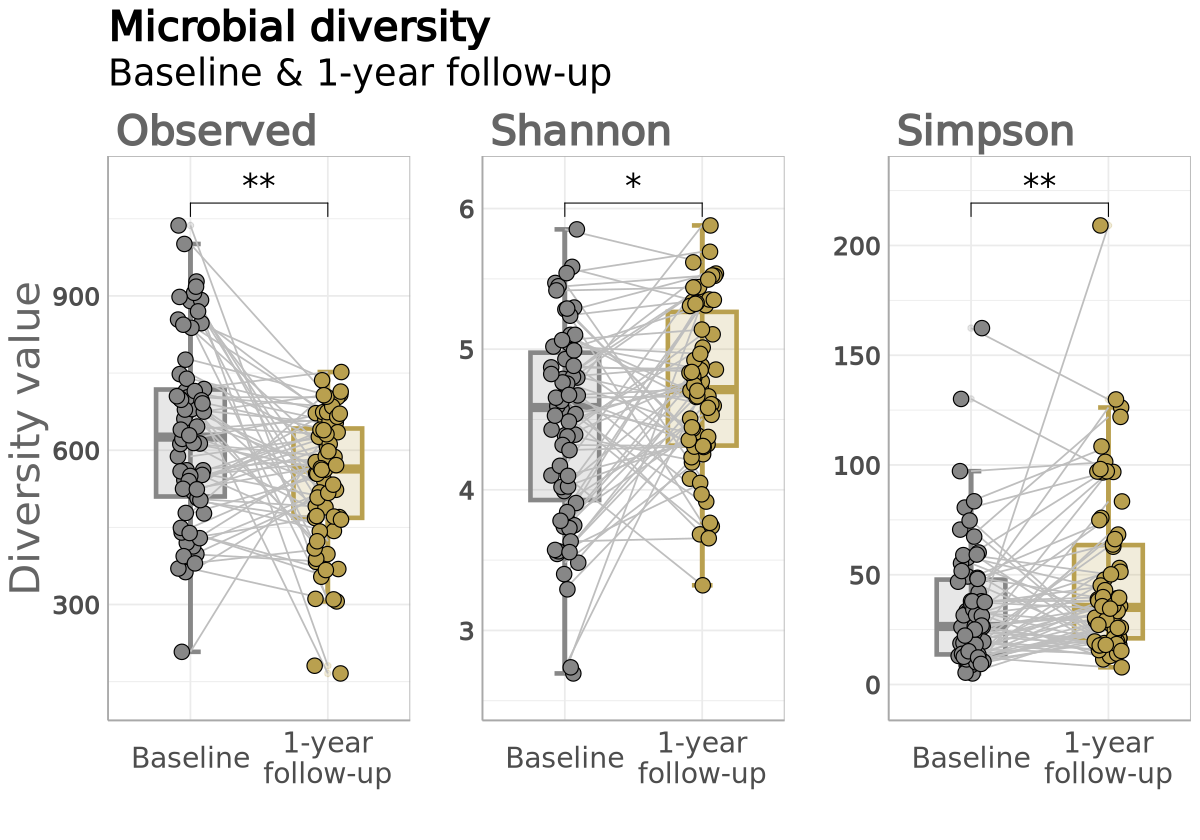

In [13]:
# set a figure size
width = 10
height = 7
options(repr.plot.width=width, repr.plot.height=height)
comparisons <- list(c("Baseline", "1-year\nfollow-up"))

# plot a figure
p <- ggplot(alpha_div, aes(x=collection_timepoint, y=value, color = collection_timepoint, fill=collection_timepoint)) + 
# plot error bar first
      stat_boxplot(geom = "errorbar", width = 0.15, lwd=1.3) +
# lay boxplot on top
      geom_boxplot(alpha=0.2, lwd=1.3, width=0.5) +
# lines connecting pairs of samples
      geom_line(aes(x = collection_timepoint, group = host_subject_id), color = "gray", size = 0.5,) +
# overlay alpha-diversity values as dots
      geom_jitter(size=4, width=0.1, shape=21, color='black')  + 
# add p-value statistics
      stat_compare_means(  
                         id = "host_subject_id", comparisons = comparisons, 
                         method = "wilcox.test", paired=TRUE, 
                         label = "p.signif", 
                         symnum.args = symnum.args, size = 7) +
# build a separate plot for each alpha-diversity metric
      facet_wrap(~metric, scales = "free_y") + 
# change default colors
      scale_fill_manual(values = c('#878787', '#b9a04f')) + 
      scale_colour_manual(values = c('#878787', '#b9a04f')) +
# add titles
      labs(x = "", y = "Diversity value", title = "Microbial diversity",
           subtitle = "Baseline & 1-year follow-up") +
# expand y limits to fit the p-value statistics into a plot
      scale_y_continuous(expand = expansion(mult = 0.1)) +
# custom plot design
      theme_minimal() +
      theme(axis.text=element_text(size=15),
            axis.title=element_text(size=25, face="bold"), 
            plot.title=element_text(size=25, face="bold"),
            plot.subtitle=element_text(size=22, face="plain"),
            strip.text = element_text(size = 25, hjust=0, color='#656565'), 
            axis.text.x.bottom = element_text(size=17, angle=0, face='plain', hjust=0.5, vjust=0.5),
            axis.title.y = element_text(color='#656565', face='plain'),
            text = element_text(size = 25, face="bold"), 
            axis.line.y = element_line(color = "darkgrey", linewidth = 0.5), 
            axis.line.x.bottom = element_line(color = "darkgrey", linewidth = 0.5), 
            panel.border     = element_rect(fill = NA, colour = "grey70", linewidth = rel(1)),
            panel.spacing.x = unit(2, "lines"),
            legend.position="none") 

# save a plot with a scale of k
k = 0.3
ggsave(file=file.path('../../results/figures', 'figure2', 'before_after.alpha_diversity.svg'), plot=p, 
       width=width*k, height=height*k, scaling = k)
# show a plot
print(p)

In [14]:
# perform wilcox.test manually to retrieve p-valeus
test_res <- data.frame()
for (metric in c('Observed', 'Shannon', 'Simpson')) {
    observed <- alpha_div[alpha_div$metric == metric, ]
    
    stat.test <- compare_means(
      value ~ collection_timepoint, data = observed,
      method = "wilcox.test", paired=TRUE,
      id = 'host_subject_id',
    )
    stat.test['metric'] = metric
    test_res <- rbind(test_res, stat.test)
}
test_res

.y.,group1,group2,p,p.adj,p.format,p.signif,method,metric
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
value,Baseline,1-year follow-up,0.006056175,0.0061,0.0061,**,Wilcoxon,Observed
value,Baseline,1-year follow-up,0.013670789,0.0140,0.014,*,Wilcoxon,Shannon
value,Baseline,1-year follow-up,0.004563840,0.0046,0.0046,**,Wilcoxon,Simpson
